
## Objectifs
##### 1 Lire et traiter des données d'entrée avec [PANDAS](https://pandas.pydata.org/)

##### 2 Représenter la distribution empirique des "fold-change" (**FC**) vs Précision, aka: volcano-plot
    
##### 3 Effectuer une analyse de sur-représentation en termes GO


## Ressources : Rappels et illustration de l'analyse de représentation de termes GO
###### [TP de MADP](https://github.com/glaunay/tp-proteomics#3-obtention-des-param%C3%A8tres-du-mod%C3%A8le)
###### [Fiche Bioconductor](https://www.bioconductor.org/help/course-materials/2015/SeattleApr2015/E_GeneSetEnrichment.html)



### Préparation de  l'environnement

##### Please `pip install -r requirements.txt` first

##### Fichiers necessaires:
* `TCL_wt1.tsv`: l'experience de protéomique                       
* `tree_ecoli_K12_measured_redis.pik`: Un arbre d'ontologie GO (voir plus bas)
* `uniprot_store_ecoli_K12.pik`: le protéome uniprot d'E.Coli


In [2]:
import pandas
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.patches as patches

### Lecture des valeurs experimentales
Charger ```TCL_wt1.tsv``` dans une [dataframe pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ 
Retirer les lignes présentant des aberrations numériques
</span>
<br/><span style="color:firebrick;font-weight:bold">$\rhd$ Attention aux types des colonnes !</span>

,Accession,Description,Gene Symbol,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),LOG10 Adj.P-val
0,P75936,Basal-body rod modification protein FlgD OS=Es...,flgD,0.075817,-3.721335,0.000055,4.260067
1,P76231,Uncharacterized protein YeaC OS=Escherichia co...,yeaC,0.092810,-3.429569,0.000351,3.454627
2,P0A8S9,Flagellar transcriptional regulator FlhD OS=Es...,flhD,0.102614,-3.284695,0.000027,4.571899
4,P05706,PTS system glucitol/sorbitol-specific EIIA com...,srlB,0.108497,-3.204277,0.019963,1.699768
5,P29744,Flagellar hook-associated protein 3 OS=Escheri...,flgL,0.124183,-3.009460,0.036746,1.434787
...,...,...,...,...,...,...,...
2011,P77330,Prophage lipoprotein Bor homolog OS=Escherichi...,borD,1.535948,0.619129,0.310725,0.507623
2016,P02930,Outer membrane protein TolC OS=Escherichia col...,tolC,1.552288,0.634396,0.013373,1.873757
2020,P0A917,Outer membrane protein X OS=Escherichia coli (...,ompX,1.579739,0.659686,0.002226,2.652391
2021,P02931,Outer membrane protein F OS=Escherichia coli (...,ompF,1.754902,0.811390,0.000068,4.164956


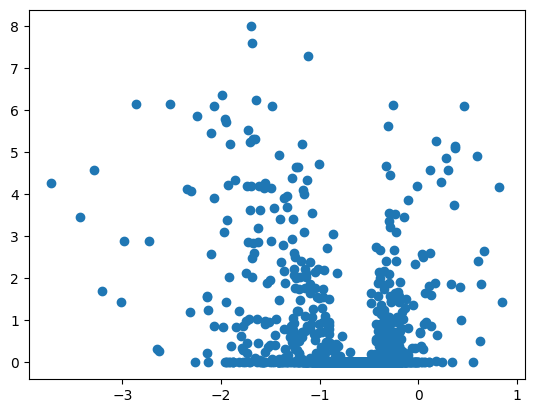

In [77]:
df = pandas.read_table("../data/TCL_wt1.tsv", delimiter="\t", na_values="#VALEUR!").dropna()
log2_AR = df['Log2 Corrected Abundance Ratio']
log10_PV = df['LOG10 Adj.P-val']
fig,ax = plt.subplots()
_ = ax.scatter(log2_AR,log10_PV)
df

##### 1. Un premier volcano-plot

Ce type de figure représente pour chaque protéine en abscisse le taux d'abondance et en ordonnée la précision de la mesure.

<span style="color:firebrick;font-weight:bold">$\rhd$ 1. Réaliser un scatter plot matplotlib avec</span>
<br/><span style="color:firebrick;font-weight:bold">- en x, `Log2 Corrected Abundance Ratio`</span>
<br/><span style="color:firebrick;font-weight:bold">-  en y, `LOG10 Adj.P-val`</span>

<span style="color:firebrick;font-weight:bold">$\rhd$Vous légenderez les axes, attention `LOG10 Adj.P-val` est en fait `-LOG10 Adj.P-val`, regardez bien.</span>

##### 2. Réaliser des versions évoluées du graphique précédent
L'objectif est de mettre l'accent sur la région **-Log10 adj Pvalue > 4** et **Log2 corrected abundance ratio > 0**.
<br/>Pour cela vous revisiterez le scatter plot précedent au travers des versions suivantes:
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ première version : un rectangle de la couleur de votre choix matérialisera la région</span>
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ deuxième version  : une couleur de votre choix représentera les points de la région</span>
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ troisème version (optionnel): Les identifiants uniprot remplaceront les points des protéines de la région</span>

,Accession,Description,Gene Symbol,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),LOG10 Adj.P-val
1968,P0ACF8,DNA-binding protein H-NS OS=Escherichia coli (...,hns,1.083007,0.115042,2.679790e-05,4.571899
1977,P62399,50S ribosomal protein L5 OS=Escherichia coli (...,C813_RS16705; C813_RS25010; rplE; AB182_RS27795,1.133987,0.181404,5.518020e-06,5.258216
1979,P0A905,Outer membrane lipoprotein SlyB OS=Escherichia...,slyB,1.173856,0.231256,5.109990e-05,4.291580
1982,P76506,Probable phospholipid-binding lipoprotein MlaA...,mlaA,1.213725,0.279442,1.408320e-05,4.851298
1984,P13036,Fe(3+) dicitrate transport protein FecA OS=Esc...,fecA,1.230719,0.299501,2.679790e-05,4.571899
1992,P06971,Ferrichrome outer membrane transporter/phage r...,fhuA,1.293464,0.371240,6.974880e-06,5.156463
1996,P0A910,Outer membrane protein A OS=Escherichia coli (...,ompA,1.294771,0.372697,7.838330e-06,5.105776
2003,P06996,Outer membrane protein C OS=Escherichia coli (...,ompC,1.377124,0.461659,8.100070e-07,6.091511
2009,P76344,Metal-binding protein ZinT OS=Escherichia coli...,zinT,1.503268,0.588102,1.236300e-05,4.907876
2021,P02931,Outer membrane protein F OS=Escherichia coli (...,ompF,1.754902,0.811390,6.839810e-05,4.164956


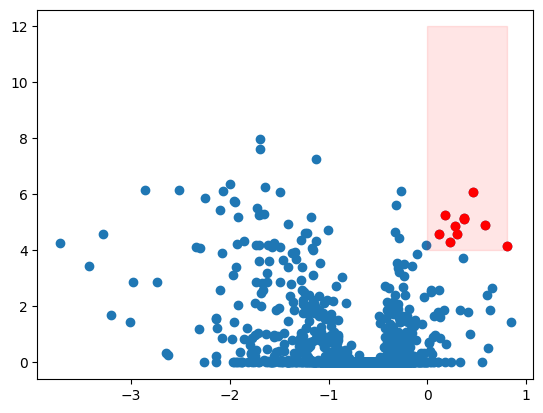

In [29]:
%matplotlib inline
from matplotlib import pyplot as plt
log2_AR = df['Log2 Corrected Abundance Ratio']
log10_PV = df['LOG10 Adj.P-val']

fig, ax = plt.subplots()

# Create a scatter plot
ax.scatter(log2_AR, log10_PV, label='All Data')

# Filtered data
filtered_data = df[(df['LOG10 Adj.P-val'] > 4) & (df['Log2 Corrected Abundance Ratio'] > 0)]

ax.scatter(filtered_data['Log2 Corrected Abundance Ratio'], filtered_data['LOG10 Adj.P-val'], color = "r")

# Define the rectangle
rectangle = patches.Rectangle((0, 4), filtered_data['Log2 Corrected Abundance Ratio'].max(), log10_PV.max(),alpha=0.1, color = "r")
ax.add_patch(rectangle)

filtered_data

#### Analyse ORA

##### Principes
Vous disposez d'un arbre de termes de la [GeneOntology](https://www.geneontology.org/) dans lequel toutes les protéines detectées dans l'experience ontété renseignée. Cet arbre va vous permttre de calculerla sur-représentation (**ORA**) des termes GO portés par un groupe de protéine d'intérêt versus un groupe de protéines de référence. Le groupe de référence peut être tout le protéome de l'organisme ou uniquement les protéines détéctées dans l'experience.
**Vous devrez construire la liste de protéines interessantes**

L'arbre des termes GO est à créer à partir du ficher pickle nommé *tree_ecoli_K12_measured_redis.pik*
```python
import pickle
go_tree = pickle.load( open("PATH/TO/tree_ecoli_K12_measured_redis.pik", "rb" ) )
```
#### Cet objet a différente fonctionalités comme :
##### Regarder un terme GO, par son nom commun ou son identifiant GO :
```python
print(go_tree.view_go_node('metal ion transport'))
print(go_tree.view_go_node('GO:0030001'))
```
##### Lister les protéines qui portent un terme GO particulier. Attention, il peut y en avoir beaucoup!
```python
print(go_tree.get_proteins('GO:0030001'))
print(go_tree.get_proteins('metal ion transport'))
```
##### Calculer de scores et pvaleurs d'ORA à l'aide du module `obogo.statistics` sur:
Dans les exemples suivants, on considera comme protéines d'intérêt la liste factice suivante d'identifiants uniprot  : `['P02930', 'P03819', 'P0A910']`
###### => Un terme GO en particulier : 
La fonction `compute_node_ora`, attend trois arguments positonnels: l'arbre des termes GO et la liste de protéines d'intérêt et le terme GO à analyser (sous forme de nom ou d'identifiant).

Le calcul est, par défaut, réalisé en se basant sur la représentation du terme GO dans le tout le protéome.

La population, plus réduite, des protéines de l'experience peut être utilisée à la place, à l'aide du paramètre `norm` mis à la valeur *"measured"*.

```python
from obogo.statistics import compute_node_ora
print( compute_node_ora(go_tree, ['P02930', 'P03819', 'P0A910'], 'GO:0006811') )
print( compute_node_ora(go_tree, ['P02930', 'P03819', 'P0A910'], 'metal ion transport') )
print( compute_node_ora(go_tree, ['P02930', 'P03819', 'P0A910'], 'GO:0006811', norm='measured') )
```

###### => Tous les termes GO de l'arbre
La fonction `score_ora_tree` retournera un génerateur des scores de chaque terme GO. Le paramètre `norm` est aussi disponible.

```python
from obogo.statistics import score_ora_tree
for go_score in score_ora_tree(go_tree, ['P02930', 'P03819', 'P0A910']):
    print(go_score)
```

<span style="color:green;font-weight:bold">$\uparrow$ Reproduire cet exemple dans la cellule ci-dessous.$\downarrow$ </span>
</br><span style="color:firebrick;font-weight:bold"> $\rhd$ Inspecter les objets retournés par les fonctions  compute_node_ora et compute_node_ora, que voyez-vous ?</span>

In [1]:
import pickle
go_tree = pickle.load( open("../data/tree_ecoli_K12_measured_redis.pik", "rb" ) )

from obogo.statistics import compute_node_ora
print( compute_node_ora(go_tree, ['P02930', 'P03819', 'P0A910'], 'GO:0006811') )
#print( compute_node_ora(go_tree, ['P02930', 'P03819', 'P0A910'], 'metal ion transport') )
#print( compute_node_ora(go_tree, ['P02930', 'P03819', 'P0A910'], 'GO:0006811', norm='measured') )

from obogo.statistics import score_ora_tree
# for go_score in score_ora_tree(go_tree, ['P02930', 'P03819', 'P0A910'])

('GO:0006811', 'monoatomic ion transport', 3, inf, 5.509404290325564e-05, [(3, 0), (148, 3792)])


###### 2/ Analyser la représentation des termes GO parmi les protéines surabondantes de l'experience
<span style="color:firebrick;font-weight:bold"> $\rhd$ Vous devrez extraire les identifiants uniprot des protéines aux `Log2 Corrected Abundance Ratio` supérieurs au seuil alpha de 5%.</span>
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ Vous conduirez sur cette liste de protéines une analyse de sur-représentation en termes GO à l'aide du package obogo.</span>
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ Vous pouvez faire varier le seuil d'abondance autour de la valeur alpha.</span>
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ Vous supprimerez les scores ORA qui vous semblent non pertinents.</span>
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ Vous ordonnerez les résutats par significativité décroissante.</span>
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ Vous séparerez les scores selon les namespaces de Gene Ontology auquels ils appartiennent (*biological_process, molecular_function ou cellular_component*).</span>



Vous pourrez stocker les résultats ainsi mis en forme au [les sauvegarder au format json](https://docs.python.org/3/library/json.html).


In [2]:
prot_sub = filtered_data.loc[(filtered_data['Log2 Corrected Abundance Ratio']>0.05) & (filtered_data['LOG10 Adj.P-val']> 0),'Accession'].to_list()
scores = []
for go_score in score_ora_tree(go_tree, prot_sub):
    scores.append(go_score)
scores_sorted = sorted(scores, key = lambda x: x[4])


NameError: name 'filtered_data' is not defined

In [85]:
go_tree.get_go_node('GO:0009279')

{'_id': 'GO:0009279',
 'name': 'cell outer membrane',
 'def': 'A lipid bilayer that forms the outermost membrane of the cell envelope; enriched in polysaccharide and protein; the outer leaflet of the membrane contains specific lipopolysaccharide structures.',
 'comment': 'To',
 'subset': 'prokaryote_subset',
 'synonym': 'outer membrane of cell',
 '_is_a': 'GO:0019867',
 'relationship': ['part_of', 'part_of'],
 'background': {UniprotDatum(id='P02929', full_name='Protein TonB', name='TONB_ECOLI', gene_name='tonB', taxid=83333, sequence='MTLDLPRRFPWPTLLSVCIHGAVVAGLLYTSVHQVIELPAPAQPISVTMVTPADLEPPQAVQPPPEPVVEPEPEPEPIPEPPKEAPVVIEKPKPKPKPKPKPVKKVQEQPKRDVKPVESRPASPFENTAPARLTSSTATAATSKPVTSVASGPRALSRNQPQYPARAQALRIEGQVKVKFDVTPDGRVDNVQILSAKPANMFEREVKNAMRRWRYEPGKPGSGIVVNILFKINGTTEIQ', go=[GODatum(id='GO:0030313', evidence='ECO:0000314', term='C:cell envelope'), GODatum(id='GO:0009279', evidence='ECO:0000303', term='C:cell outer membrane'), GODatum(id='GO:0009897', evidence='ECO:0000314', term='C:ex

## Une première application: représentation riche du résultat de l'analyse


### Mise en forme "riche" des résultats grâce au notebook

Jupyter permet d'étendre le concept de la méthode **__str__()** afin de produire du contenu HTML.
 Ainsi, tout objet impémentant une méthode **_repr_html_()** sera affiché, via son rendu HTML, dans la cellule d'un notebook.

```python
class Point():
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    def _repr_html_(self):
        htmlString = "<table><thead><tr><td>Abscisse</td><td>Ordonnée</td><td>Cote</td></tr></thead>"
        htmlString += f"<tbody><tr><td>{self.x}</td><td>{self.y}</td><td>{self.z}</td></tr></tbody></table>"
        return htmlString
Point(2,3,4)
```
Affichera

![caption](../figs/reprhtml.png)


### Intégration des résultats à la visualisation du notebook 

En vous inspirant de la fonction ci-dessus, implémenter une classe **Rich_GO_ORA** dont la méthode [`_repr_html_`](https://ipython.readthedocs.io/en/stable/config/integrating.html) permettra un affichage plus lisible d'une des analyses `biological_process / molecular_function /cellular_component`

Un exemple possible est,
![caption](../figs/_repr_html_.png)

(Bonus): clicker sur le nom du terme GO envoie vers sa description.
Pour cela, afficher le nom du pathway dans une balise hyperlien pour permettre d'acceder à la page de description du terme GO. 

Les termes GO sont accessibles aux URL de la forme
`http://amigo.geneontology.org/amigo/term/GO:GO_NUMBER`.




In [64]:
class Table():
    def __init__(self, go_table):
        self.data = go_table
    def _repr_html_(self):
        htmlString = "<table><thead><tr><td>Pathway name</td><td>P-val</td><td>n</td></tr></thead><tbody>"
        
        for line in self.data:
            htmlString += f"<tr><td><a href=http://amigo.geneontology.org/amigo/term/{line[0]}>{line[1]}</a></td><td>{line[4]}</td><td>{line[2]}</td></tr>"
        
        htmlString += "</tbody></table>"
        return htmlString
        
Table(scores_sorted)

Pathway name,P-val,n
cell outer membrane,2.5431510161083363e-09,7
outer membrane,4.443872653658289e-09,7
pore complex,1.1148932248970586e-05,3
porin activity,6.161068212455628e-05,3
wide pore channel activity,6.161068212455628e-05,3
monoatomic ion transport,0.00036251509007314544,4
siderophore-iron transmembrane transporter activity,0.00037701726748287304,2
channel activity,0.0005168566019266084,3
passive transmembrane transporter activity,0.0005168566019266084,3
signaling receptor activity,0.0005184205343064551,2


## Une deuxième application: volcano plot améliorés
#### Combinons maintenant les données ORA et celles de table experimentale
##### Pour la catégorie de termes GO (biological_process / molecular_function /cellular_component) de votre choix
<span style="color:firebrick;font-weight:bold"> $\rhd$ Selectionnez 4 termes GO que vous estimez les plus pertinents </span>
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ Générer une grille de 4 volcano-plot, un pour chaque terme </span>
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ Dans chaque volcano plot colorez dans une couleur différente les protéines porteuses du terme GO considéré </span>
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ Donnez le nom de la catégorie générale (namespace GO) à la grille</span>
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ Donnez le nom du terme GO représenté dans chaque graphique avec une couleur de titre cohérente </span>

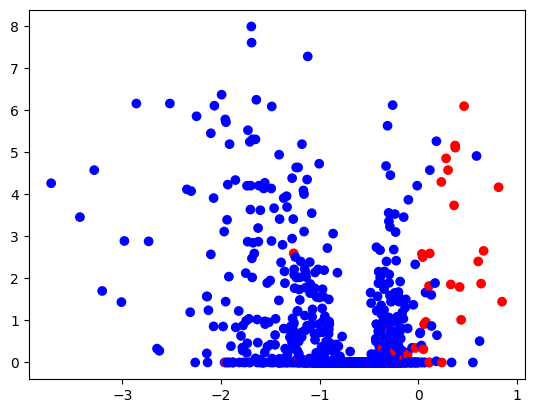

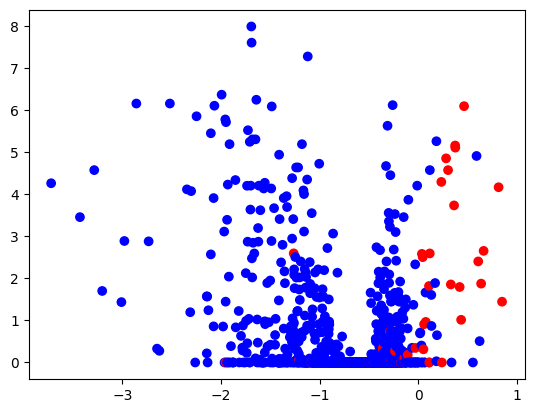

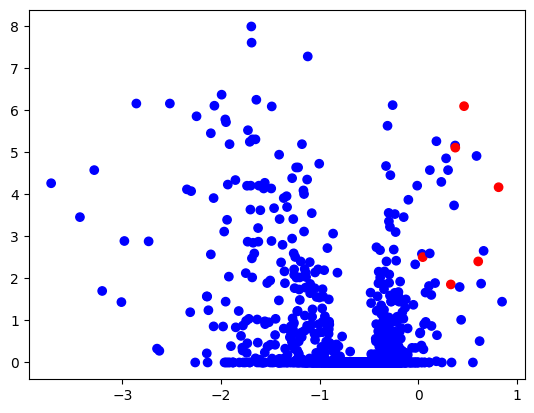

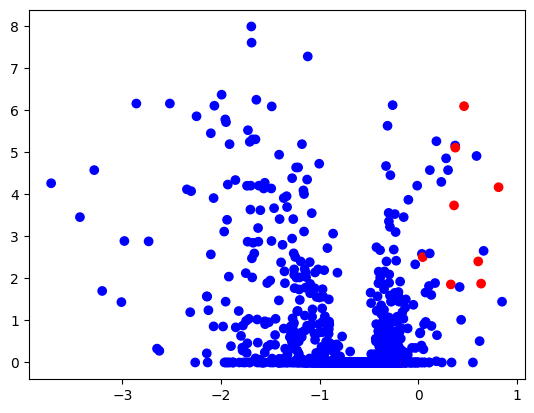

In [95]:
for go in scores_sorted[:4]:
    prot = go_tree.view_go_node(go[0])['background']
    col = [ "red" if ac in prot else "blue" for ac in df['Accession']]
    #siz = [ 25 if ac in prot else 10 for ac in df['Accession']]
    
    fig, ax = plt.subplots()
    _ = ax.scatter(df['Log2 Corrected Abundance Ratio'], df['LOG10 Adj.P-val'], color = col)